# imports

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

writer = pd.ExcelWriter('./results/data_of_all.xlsx', engine='xlsxwriter')

# config

In [97]:
config_prefix = ['TI', 'TR', 'BR', 'BI']

config_datasheet = r'./results/preprocessed.xlsx'

# import df

In [98]:
df_raw = pd.read_excel(config_datasheet)
df_raw = df_raw[df_raw["Outlier"] == False]
df_raw["answer"] = df_raw["answer"].astype(str)
df_raw

,case,factor,algorithm,answer,idk,time,correctness,Run Out Of Time,Outlier
0,198,TI,BinarySearch,Arooba,False,8,False,False,False
1,211,TI,BinarySearch,3,False,58,True,False,False
2,224,TI,BinarySearch,3,False,30,True,False,False
3,231,TI,BinarySearch,3,False,85,True,False,False
4,232,TI,BinarySearch,3,False,5,True,False,False
...,...,...,...,...,...,...,...,...,...
152,182,BI,ReverseString,Arooba,False,4,False,False,False
153,210,BI,ReverseString,gnikcarTeyE,False,72,True,False,False
154,212,BI,ReverseString,gnikcarTeyE,False,60,True,False,False
155,226,BI,ReverseString,"""gnikcarTeyE""",False,29,True,False,False


# Correctness Ratio

In [117]:
df_total = df_raw.copy()
df_total["algorithm"] = "Total"
df_sub = pd.concat([df_raw, df_total])

df_result = pd.DataFrame(columns=["Factor", "Algorithm", "NumberOfResponses", "CorrectResponses"])
for algorithm in df_sub["algorithm"].unique():
    for factor in df_sub["factor"].unique():
        df_current = df_sub[(df_sub["factor"] == factor) & (df_sub["algorithm"] == algorithm)]
        total = len(df_current)
        correct = len(df_current[df_current["correctness"] == True])
        df_result.loc[len(df_result)] = [factor, algorithm, total, correct]
df_result["Ratio"] = df_result[["CorrectResponses", "NumberOfResponses"]].apply(lambda x: x["CorrectResponses"]/x["NumberOfResponses"] if x["NumberOfResponses"] != 0 else 0, axis=1)
df_result["Ratio"] = df_result["Ratio"].round(2)
df_result

,Factor,Algorithm,NumberOfResponses,CorrectResponses,Ratio
0,TI,BinarySearch,7,5,0.71
1,TR,BinarySearch,4,3,0.75
2,BR,BinarySearch,5,2,0.40
3,BI,BinarySearch,5,3,0.60
4,TI,BubbleSort,5,3,0.60
5,TR,BubbleSort,7,4,0.57
6,BR,BubbleSort,5,3,0.60
7,BI,BubbleSort,4,0,0.00
8,TI,Factorial,0,0,0.00
9,TR,Factorial,4,3,0.75


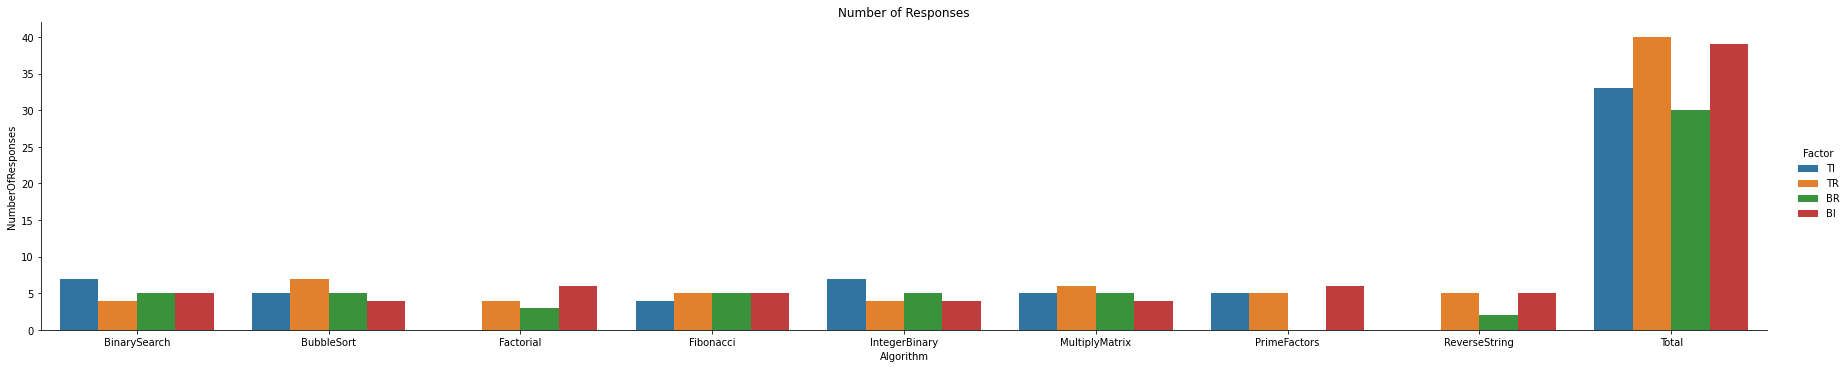

In [118]:
ax = sns.catplot(x="Algorithm", y="NumberOfResponses", hue="Factor", data=df_result, kind="bar",
                 height=5, aspect=5)
ax.tight_layout()
plt.title("Number of Responses")
plt.show()
plt.close('all')

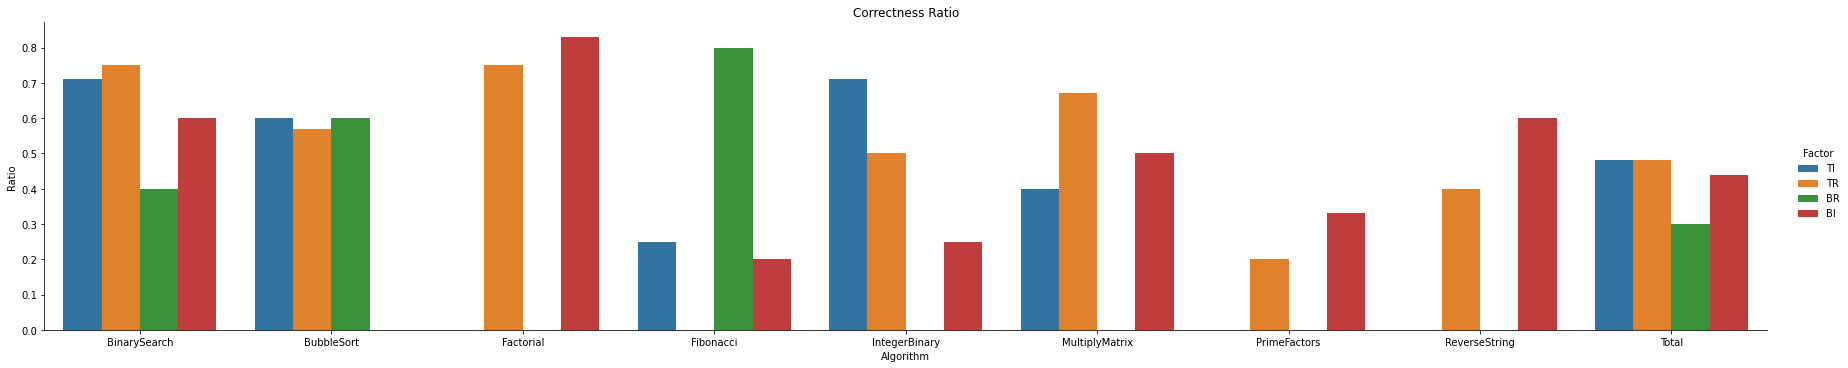

In [119]:
ax = sns.catplot(x="Algorithm", y="Ratio", hue="Factor", data=df_result, kind="bar",
                 height=5, aspect=5)
ax.tight_layout()
plt.title("Correctness Ratio")
plt.show()
plt.close('all')

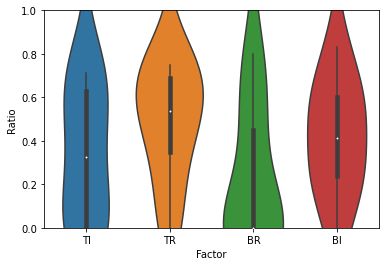

In [120]:
df_tmp = df_result[df_result["Algorithm"] != "Total"]
sns.violinplot(x="Factor", y="Ratio", data=df_tmp)
plt.ylim(0,1)
plt.show()

In [121]:
df_result.groupby(["Algorithm", "Factor"])["Ratio"].describe()[["count", "mean", "std"]].transpose()

Algorithm BinarySearch                  BubbleSort                 Factorial  \
Factor              BI   BR    TI    TR         BI   BR   TI    TR        BI   
count              1.0  1.0  1.00  1.00        1.0  1.0  1.0  1.00      1.00   
mean               0.6  0.4  0.71  0.75        0.0  0.6  0.6  0.57      0.83   
std                NaN  NaN   NaN   NaN        NaN  NaN  NaN   NaN       NaN   

Algorithm       ... PrimeFactors      ReverseString                Total       \
Factor      BR  ...           TI   TR            BI   BR   TI   TR    BI   BR   
count      1.0  ...          1.0  1.0           1.0  1.0  1.0  1.0  1.00  1.0   
mean       0.0  ...          0.0  0.2           0.6  0.0  0.0  0.4  0.44  0.3   
std        NaN  ...          NaN  NaN           NaN  NaN  NaN  NaN   NaN  NaN   

Algorithm              
Factor       TI    TR  
count      1.00  1.00  
mean       0.48  0.48  
std         NaN   NaN  

[3 rows x 36 columns]

In [122]:
print(df_result.groupby(["Algorithm", "Factor"])["Ratio"].describe()[["count", "mean", "std"]].transpose().to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
Algorithm & \multicolumn{4}{l}{BinarySearch} & \multicolumn{4}{l}{BubbleSort} & \multicolumn{4}{l}{Factorial} & \multicolumn{4}{l}{Fibonacci} & \multicolumn{4}{l}{IntegerBinary} & \multicolumn{4}{l}{MultiplyMatrix} & \multicolumn{4}{l}{PrimeFactors} & \multicolumn{4}{l}{ReverseString} & \multicolumn{4}{l}{Total} \\
Factor &           BI &   BR &    TI &    TR &         BI &   BR &   TI &    TR &        BI &   BR &   TI &    TR &        BI &   BR &    TI &   TR &            BI &   BR &    TI &   TR &             BI &   BR &   TI &    TR &           BI &   BR &   TI &   TR &            BI &   BR &   TI &   TR &    BI &   BR &    TI &    TR \\
\midrule
count &          1.0 &  1.0 &  1.00 &  1.00 &        1.0 &  1.0 &  1.0 &  1.00 &      1.00 &  1.0 &  1.0 &  1.00 &       1.0 &  1.0 &  1.00 &  1.0 &          1.00 &  1.0 &  1.00 &  1.0 &            1.0 &  1.0 &  1.0 &  1.00 &         1.00 &  1.0 &  1.0 &  1.0 &           1.0 & 

# Response Time

In [123]:
df_total = df_raw.copy()
df_total["algorithm"] = "Total"
df_sub = pd.concat([df_raw, df_total])
df_result = df_sub[["case", "factor", "algorithm", "time"]].copy()

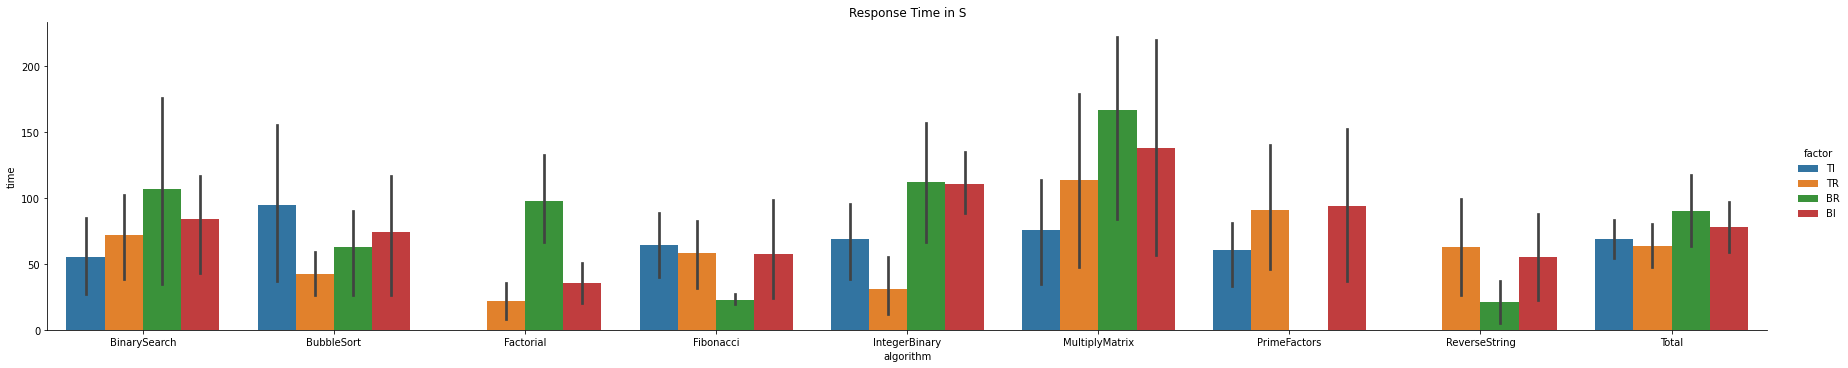

In [124]:
ax = sns.catplot(x="algorithm", y="time", hue="factor", data=df_result, kind="bar",
                 height=5, aspect=5)
ax.tight_layout()
plt.title("Response Time in S")
plt.show()
plt.close('all')

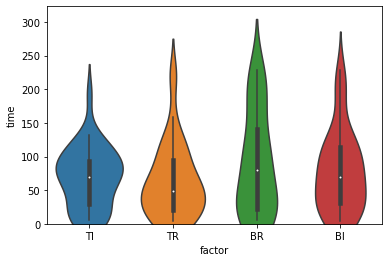

In [125]:
df_tmp = df_result[df_result["algorithm"] != "Total"]
sns.violinplot(x="factor", y="time", data=df_tmp)
plt.ylim(0,)
plt.show()

In [126]:
df_result.groupby(["algorithm", "factor"])["time"].describe()[["count", "mean", "std"]].transpose().round(0)

algorithm BinarySearch                    BubbleSort                    \
factor              BI     BR    TI    TR         BI    BR    TI    TR   
count              5.0    5.0   7.0   4.0        4.0   5.0   5.0   7.0   
mean              84.0  107.0  55.0  72.0       74.0  63.0  95.0  43.0   
std               47.0   94.0  43.0  40.0       54.0  39.0  69.0  24.0   

algorithm Factorial        ... PrimeFactors             ReverseString        \
factor           BI    BR  ...           BI    TI    TR            BI    BR   
count           6.0   3.0  ...          6.0   5.0   5.0           5.0   2.0   
mean           35.0  98.0  ...         94.0  61.0  91.0          56.0  21.0   
std            22.0  33.0  ...         82.0  33.0  60.0          42.0  23.0   

algorithm       Total                    
factor       TR    BI    BR    TI    TR  
count       5.0  39.0  30.0  33.0  40.0  
mean       63.0  78.0  90.0  69.0  63.0  
std        49.0  60.0  75.0  45.0  54.0  

[3 rows x 33 columns]

In [128]:
print(df_result.groupby(["algorithm", "factor"])["time"].describe()[["count", "mean", "std"]].transpose().round(0).to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
algorithm & \multicolumn{4}{l}{BinarySearch} & \multicolumn{4}{l}{BubbleSort} & \multicolumn{3}{l}{Factorial} & \multicolumn{4}{l}{Fibonacci} & \multicolumn{4}{l}{IntegerBinary} & \multicolumn{4}{l}{MultiplyMatrix} & \multicolumn{3}{l}{PrimeFactors} & \multicolumn{3}{l}{ReverseString} & \multicolumn{4}{l}{Total} \\
factor &           BI &     BR &    TI &    TR &         BI &    BR &    TI &    TR &        BI &    BR &    TR &        BI &    BR &    TI &    TR &            BI &     BR &    TI &    TR &             BI &     BR &    TI &     TR &           BI &    TI &    TR &            BI &    BR &    TR &    BI &    BR &    TI &    TR \\
\midrule
count &          5.0 &    5.0 &   7.0 &   4.0 &        4.0 &   5.0 &   5.0 &   7.0 &       6.0 &   3.0 &   4.0 &       5.0 &   5.0 &   4.0 &   5.0 &           4.0 &    5.0 &   7.0 &   4.0 &            4.0 &    5.0 &   5.0 &    6.0 &          6.0 &   5.0 &   5.0 &           5.0 &   2